In [87]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')
text_path = 'gdrive/My Drive/Adult_dataset/adult.csv'

data = pd.read_csv(text_path)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [88]:
data
data = data.drop(columns=["workclass","fnlwgt","education","educational-num","occupation","capital-gain","native-country","hours-per-week","capital-loss","capital-gain"])


In [100]:
data = data.head(1000)

In [103]:
data1 = data.head(1000)

In [104]:
# data1

# Here, we take quasi-identifiers as age, race and gender
# age is numerical identifier and gender, race are categorical identifier


data1 = data1.drop(columns=["marital-status","relationship","income"])
data1.gender = data1.gender.replace({"Male": 1, "Female": 0})
data1.race = data1.race.replace({"Black": 0, "White": 1, "Asian-Pac-Islander": 0, "Other": 0, "Amer-Indian-Eskimo": 0})

# 'Black', 'White', 'Asian-Pac-Islander', 'Other',
#        'Amer-Indian-Eskimo'


In [105]:
data1

,age,race,gender
0,25,0,1
1,38,1,1
2,28,1,1
3,44,0,1
4,18,1,0
...,...,...,...
995,17,1,0
996,59,1,0
997,22,1,1
998,40,1,1


In [ ]:
# a = data1['marital-status'].unique()
# b = data1['relationship'].unique()
# c = data1['race'].unique()
# d = data1['gender'].unique()


In [ ]:
a

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [ ]:
b

array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

In [ ]:
c

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [ ]:
d

array(['Male', 'Female'], dtype=object)

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline


kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0).fit(data1)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [115]:
kmeans.cluster_centers_

array([[4.30506912e+01, 8.70967742e-01, 7.09677419e-01, 2.00000000e+00],
       [2.28703072e+01, 8.46416382e-01, 5.97269625e-01, 1.11022302e-16],
       [6.73142857e+01, 8.85714286e-01, 7.85714286e-01, 1.00000000e+00],
       [3.36793893e+01, 8.32061069e-01, 7.32824427e-01, 1.26717557e+00],
       [5.38544304e+01, 8.48101266e-01, 7.59493671e-01, 1.00000000e+00]])

In [116]:
from collections import Counter
c = Counter(kmeans.labels_)
data1["kMeansLabels"] = kmeans.labels_
print(c.items())

dict_items([(1, 293), (3, 262), (0, 217), (2, 70), (4, 158)])


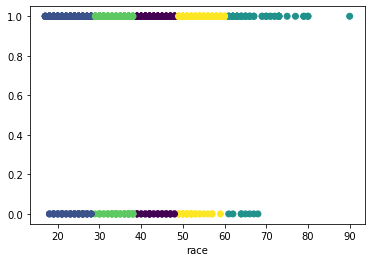

In [117]:
plt.scatter(data1["age"], data1["race"], c=data1["kMeansLabels"], cmap='viridis')
# {"Black": 0, "White": 1, "Asian-Pac-Islander": 2, "Other": 3, "Amer-Indian-Eskimo": 4}
plt.xlabel("age")
plt.xlabel("race")
plt.show()

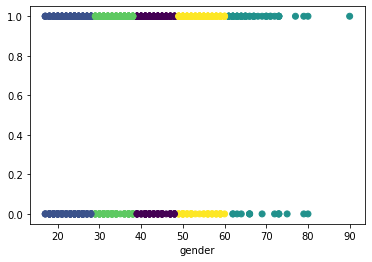

[39.73890339, 0.95039164, 0.73629243]

In [118]:
plt.scatter(data1["age"], data1["gender"], c=data1["kMeansLabels"], cmap='viridis')
plt.xlabel("age")
plt.xlabel("gender")
plt.show()
[24.79948586,  0.94601542,  0.61439589],
[57.98684211,  0.98245614,  0.76754386],
[39.73890339,  0.95039164,  0.73629243]

In [119]:
data1.loc[data1['kMeansLabels']==0]
# df.loc[df['column_name'] == some_value]

,age,race,gender,kMeansLabels
3,44,0,1,0
14,48,1,1,0
15,43,1,1,0
17,43,1,0,0
19,40,0,1,0
...,...,...,...,...
978,44,1,1,0
982,44,0,1,0
991,44,1,1,0
994,42,1,0,0


In [120]:
data1

,age,race,gender,kMeansLabels
0,25,0,1,1
1,38,1,1,3
2,28,1,1,1
3,44,0,1,0
4,18,1,0,1
...,...,...,...,...
995,17,1,0,1
996,59,1,0,4
997,22,1,1,1
998,40,1,1,0


In [99]:
!pip install pycanon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [122]:
from pycanon import anonymity, report

# FILE_NAME = "adult.csv"
QI = ["age","race","gender"]
# SA = ["salary-class"]

# Calculate k for k-anonymity:
k = anonymity.k_anonymity(data1, QI)

print("k is ",k)

k is  1


In [ ]:
data

,age,marital-status,relationship,race,gender,income
0,25,Never-married,Own-child,Black,Male,<=50K
1,38,Married-civ-spouse,Husband,White,Male,<=50K
2,28,Married-civ-spouse,Husband,White,Male,>50K
3,44,Married-civ-spouse,Husband,Black,Male,>50K
4,18,Never-married,Own-child,White,Female,<=50K
...,...,...,...,...,...,...
48837,27,Married-civ-spouse,Wife,White,Female,<=50K
48838,40,Married-civ-spouse,Husband,White,Male,>50K
48839,58,Widowed,Unmarried,White,Female,<=50K
48840,22,Never-married,Own-child,White,Male,<=50K
